In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
events_data = pd.read_csv('event_data_train.csv')
submissions_data = pd.read_csv('submissions_data_train.csv')

In [3]:
sns.set(rc = {'figure.figsize' : (9, 6)})

In [4]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [5]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [6]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [7]:
events_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [8]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [9]:
events_data['day'] = events_data.date.dt.date

In [10]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:xlabel='day'>

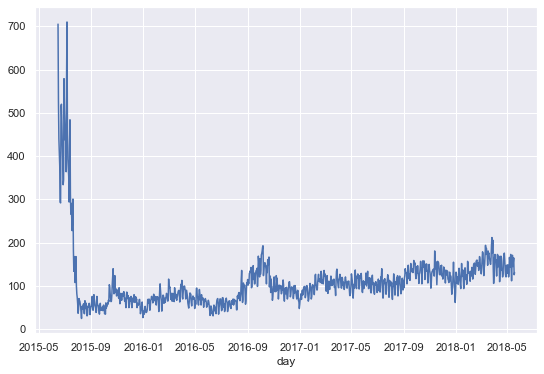

In [11]:
events_data.groupby('day').user_id.nunique().plot()

In [12]:
users_events_data = events_data.pivot_table(index = 'user_id', columns = 'action', values ='step_id', aggfunc='count', fill_value = 0).reset_index()

In [13]:
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [14]:
submissions_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [15]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 04:00:48,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 04:00:48,2015-06-15
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
3,31972,1478852164,correct,15853,2015-06-15 04:01:35,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2015-07-11 13:40:14,2015-07-11
509100,120745,1503059927,correct,13177,2015-07-11 13:40:14,2015-07-11
509101,120745,1506348153,wrong,15253,2015-07-11 13:40:19,2015-07-11
509102,120745,1523035316,wrong,1424,2015-07-11 13:40:19,2015-07-11


In [16]:
users_scores = submissions_data.pivot_table(index = 'user_id', columns = 'submission_status', values ='step_id', aggfunc='count', fill_value = 0).reset_index()

In [17]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [18]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id').timestamp.apply(list).apply(np.diff).values
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [19]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [20]:
gap_data = gap_data / (24*60*60)

<AxesSubplot:>

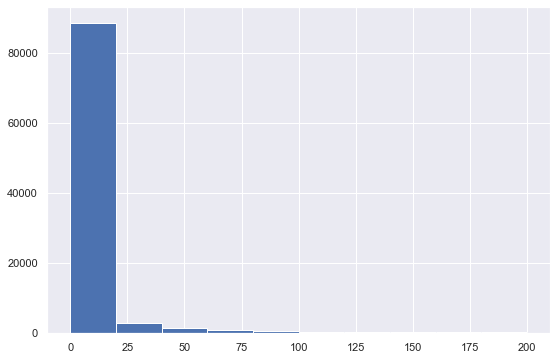

In [21]:
gap_data[gap_data < 200].hist()

In [22]:
gap_data.quantile(0.90)

18.325995370370403

In [23]:
users_data = events_data.groupby('user_id', as_index=False).aggregate({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [24]:
now = 1526772811
drop_out_threshold = 2592000

In [27]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [28]:
users_data = users_data.merge(users_scores, how='outer')

In [29]:
users_data = users_data.fillna(0)

In [30]:
users_data = users_data.merge(users_events_data, how='outer')

In [31]:
users_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [32]:
users_data = users_data.merge(users_day, how='outer')

In [33]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [34]:
users_data['passed_course'] = users_data.passed > 170

In [35]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False
